<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part1/ch02_2d_data.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Looking at Relationships

In the previous chapter, we learned how to visualize and summarize **single variables**. But real data often contains **relationships between multiple variables**. For example:
- How does height relate to weight?
- Does studying more hours lead to better grades?
- Is temperature related to ice cream sales?

In this chapter, we'll learn how to:
- **Visualize** relationships using various plots
- **Quantify** relationships using correlation
- **Make predictions** based on relationships
- **Avoid common pitfalls** in interpreting relationships

# 2.1 Plotting 2D Data

Many datasets contain **paired measurements** - two variables measured together. Understanding the relationship between these variables requires specialized visualization techniques.

This section covers:
- Plotting categorical 2D data
- Time series visualization
- Scatter plots for spatial data
- Exposing relationships between variables

## 2.1.1 Categorical Data, Counts, and Charts

When both variables are categorical, we need to show how combinations of categories occur.

### Contingency Tables

A **contingency table** (or cross-tabulation) shows frequencies for combinations of two categorical variables.

#### Example: Gender and Goals

From the Chase and Dunner study:

| | Sports | Grades | Popular | **Total** |
|---------|--------|--------|---------|-------|
| **Boy** | 117 | 60 | 60 | 237 |
| **Girl** | 23 | 130 | 88 | 241 |
| **Total** | 140 | 190 | 148 | 478 |

**Observations**:
- More boys choose sports (117 vs 23)
- More girls choose grades (130 vs 60)
- The variables appear related!

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create contingency table
data = {
    'Sports': [117, 23],
    'Grades': [60, 130],
    'Popular': [60, 88]
}
df = pd.DataFrame(data, index=['Boy', 'Girl'])
df

,Sports,Grades,Popular
Boy,117,60,60
Girl,23,130,88


**Reading the table:**
- Rows represent gender (Boy/Girl)
- Columns represent goals (Sports/Grades/Popular)
- Each cell shows the count of students

**Key observations:**
- Boys primarily value Sports (117), while Girls primarily value Grades (130)
- Total students: 478
- Clear gender differences in goal priorities!

### Stacked Bar Charts

**Stacked bar charts** show how one categorical variable is distributed across another.

There are two types:
1. **Count stacked bars**: Show absolute numbers
2. **Percentage stacked bars**: Show proportions (all bars same height)

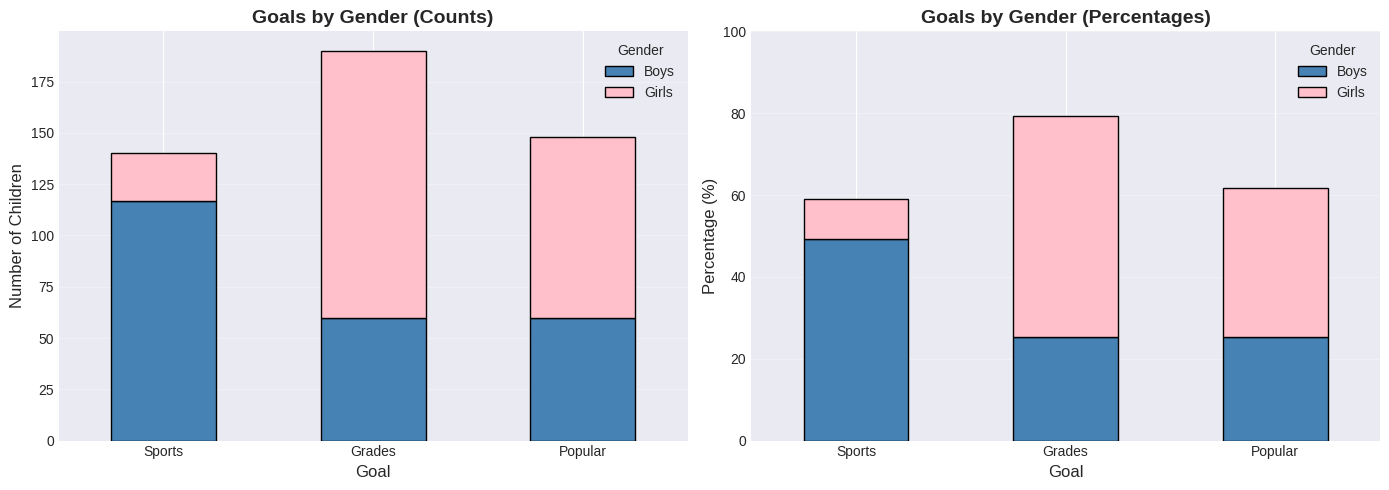

In [2]:
# Stacked bar chart - absolute counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Goals by Gender (count)
df.T.plot(kind='bar', stacked=True, ax=ax1, 
          color=['steelblue', 'pink'], edgecolor='black')
ax1.set_xlabel('Goal', fontsize=12)
ax1.set_ylabel('Number of Children', fontsize=12)
ax1.set_title('Goals by Gender (Counts)', fontsize=14, fontweight='bold')
ax1.legend(title='Gender', labels=['Boys', 'Girls'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Right: Goals by Gender (percentages)
df_pct = df.div(df.sum(axis=1), axis=0) * 100
df_pct.T.plot(kind='bar', stacked=True, ax=ax2,
              color=['steelblue', 'pink'], edgecolor='black')
ax2.set_xlabel('Goal', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.set_title('Goals by Gender (Percentages)', fontsize=14, fontweight='bold')
ax2.legend(title='Gender', labels=['Boys', 'Girls'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()


**Interpreting the charts:**

| Chart Type | Best For | What It Shows |
|------------|----------|---------------|
| **Counts (left)** | Comparing raw numbers | Boys dominate "Sports" goal |
| **Percentages (right)** | Comparing proportions | Equal height bars, focus on gender split |

**Key insight:** The percentage chart reveals that for each goal, we can see the male/female split clearly. Sports is ~85% boys, Grades is ~70% girls.

### Heat Maps

A **heat map** displays a matrix using colors - perfect for showing relationships between two categorical variables.

**Color coding:**
- Lighter colors = lower values
- Darker colors = higher values

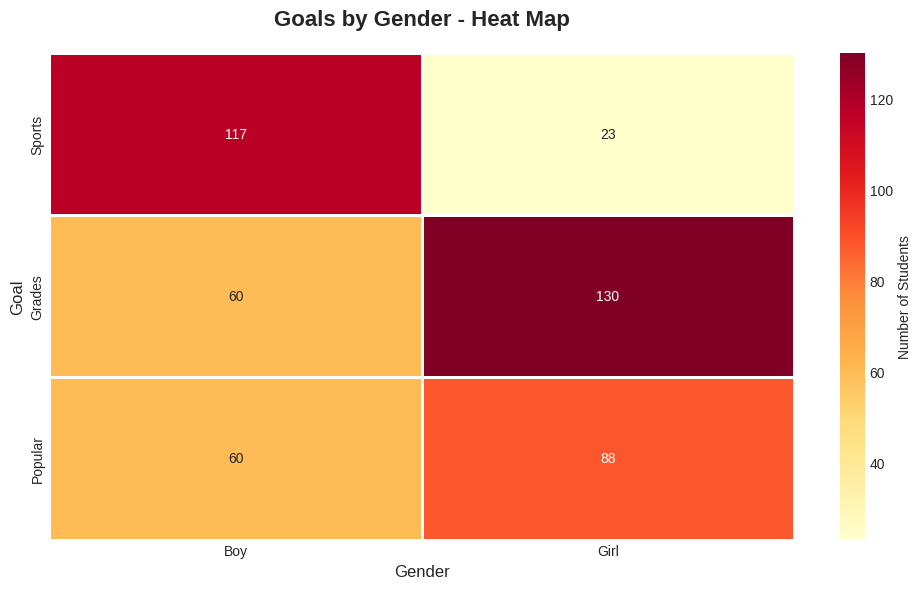

In [3]:
# Heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df.T, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Students'},
            linewidths=2, linecolor='white')
plt.title('Goals by Gender - Heat Map', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Goal', fontsize=12)
plt.tight_layout()
plt.show()


**🔍 Reading the Heat Map:**

| Color | Meaning | Example Cell |
|-------|---------|--------------|
| **Dark/Intense** | High frequency | Most common combinations |
| **Light/Pale** | Low frequency | Rare combinations |
| **Annotation** | Exact count | Numbers in each cell |

**Why better than pie charts?** Heat maps let you compare ALL combinations at once, while pie charts only show one category's breakdown.

### Ordinal Categorical Data

**Example: User Interface Evaluation (Table 2.1)**

Simulated data where users rate a UI on two scales:
- **Ease of Use:** -2 (bad) to +2 (good)
- **Enjoyability:** -2 (bad) to +2 (good)

Each cell in a 5×5 table contains the count of users with that rating combination.

**Key Finding:** Users who found the interface hard to use also didn't enjoy it (negative ease → negative enjoyability).

Table 2.1: User Interface Evaluation Counts

Ease of Use   -2  -1   0   1   2
Enjoyability                    
-2            24   5   0   0   1
-1             6  12   3   0   0
 0             2   4  13   6   0
 1             0   0   3  13   2
 2             0   0   0   1   5




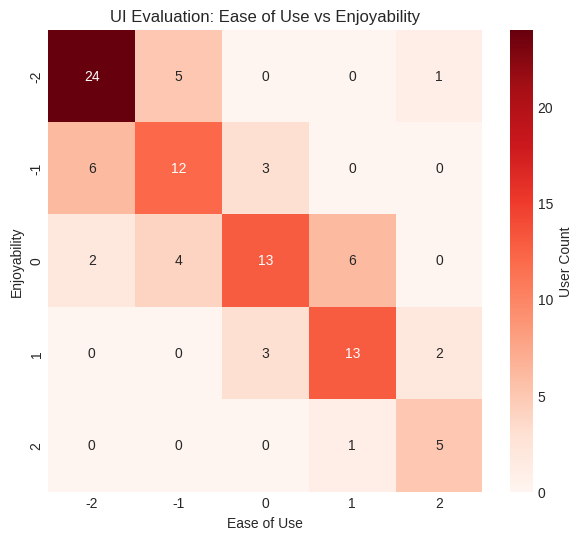


Interpretation: The diagonal pattern shows users who found it hard to use also didn't enjoy it.


In [4]:
# Table 2.1: User Interface Evaluation Data
ui_data = np.array([
    [24,  5,  0,  0,  1],  # Enjoyability = -2
    [ 6, 12,  3,  0,  0],  # Enjoyability = -1
    [ 2,  4, 13,  6,  0],  # Enjoyability =  0
    [ 0,  0,  3, 13,  2],  # Enjoyability = +1
    [ 0,  0,  0,  1,  5]   # Enjoyability = +2
])

df_ui = pd.DataFrame(ui_data, 
                     index=[-2, -1, 0, 1, 2], 
                     columns=[-2, -1, 0, 1, 2])
df_ui.index.name = 'Enjoyability'
df_ui.columns.name = 'Ease of Use'

print("Table 2.1: User Interface Evaluation Counts\n")
print(df_ui)
print("\n")

# Visualize as heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(df_ui, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'User Count'})
plt.title('UI Evaluation: Ease of Use vs Enjoyability')
plt.xlabel('Ease of Use')
plt.ylabel('Enjoyability')
plt.show()

### ⚠️ Warning: Avoid Pie Charts and 3D Bar Charts!

**Why avoid pie charts?**
- Humans are bad at judging angles
- Hard to compare similar values
- Doesn't scale well with many categories

**Why avoid 3D bar charts?**
- Some bars hide others (occlusion)
- Perspective distorts heights
- Heat maps are better!

### 🔬 Demonstrating 3D Bar Chart Problems

Let's see these problems in action with realistic business data! The example below compares a clear 2D bar chart with a 3D bar chart using the exact same sales data for 6 products across 4 quarters:

**Notice:**
- **Left chart (2D):** Clean, organized bars. Easy to answer: "Which product had the highest Q4 sales?" (Answer: Phones with 267K). Quarterly comparison is straightforward.
- **Right chart (3D):** The perspective angle and occlusion make it nearly impossible to rank products or compare values accurately. Foreground bars hide background bars, and heights are distorted by the viewing angle.

**Key Question:** Can you answer the same questions looking at the 3D version? It's much harder!


📊 QUARTERLY SALES SUMMARY (in $K):
Laptops         | Q1:145 Q2:152 Q3:138 Q4:165 | Total: 600 Avg:150
Tablets         | Q1: 98 Q2:112 Q3:105 Q4:128 | Total: 443 Avg:111
Phones          | Q1:235 Q2:248 Q3:220 Q4:267 | Total: 970 Avg:242
Watches         | Q1: 65 Q2: 78 Q3: 72 Q4: 95 | Total: 310 Avg:78
Headphones      | Q1:120 Q2:135 Q3:128 Q4:150 | Total: 533 Avg:133
Accessories     | Q1: 85 Q2: 92 Q3: 88 Q4:110 | Total: 375 Avg:94


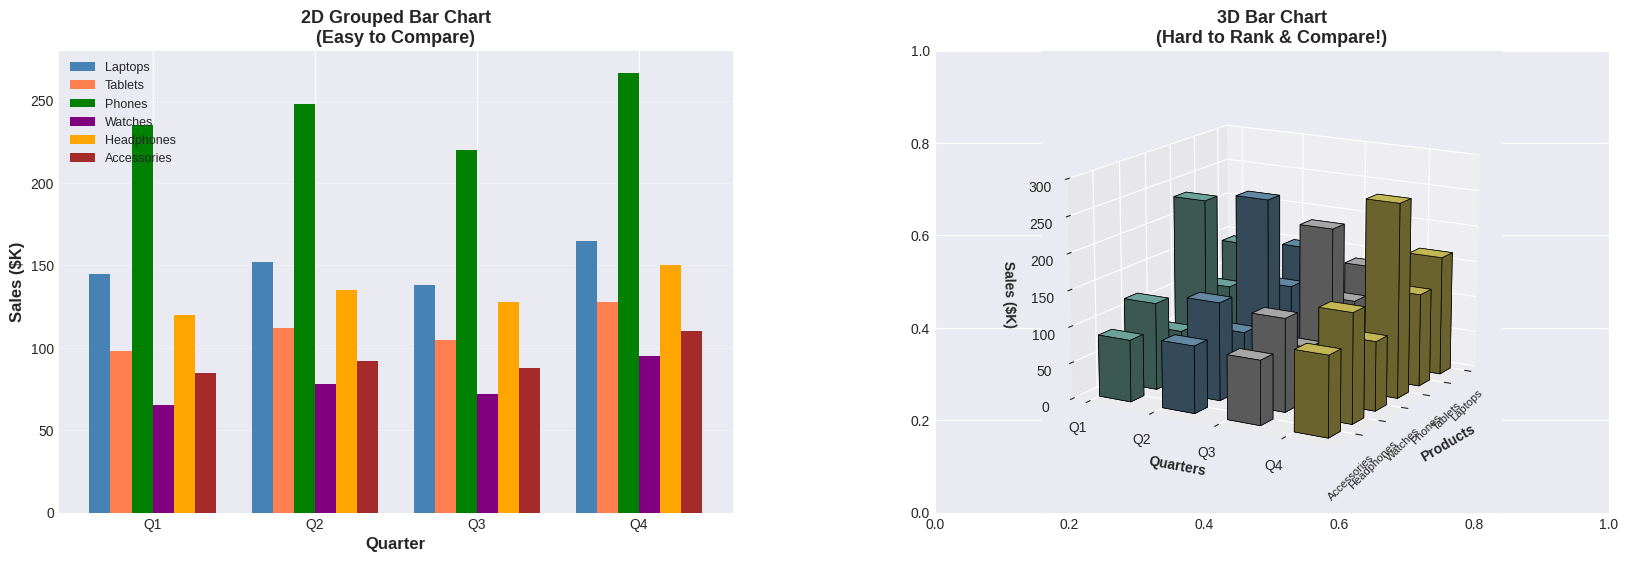

In [ ]:
# Demonstrate the problems with 3D bar charts - COMPLEX EXAMPLE
from mpl_toolkits.mplot3d import Axes3D

# Create realistic quarterly sales data for 6 products
products = ['Laptops', 'Tablets', 'Phones', 'Watches', 'Headphones', 'Accessories']
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# Sales data (in thousands of dollars) - realistic variation
sales_data = {
    'Laptops': [145, 152, 138, 165],
    'Tablets': [98, 112, 105, 128],
    'Phones': [235, 248, 220, 267],
    'Watches': [65, 78, 72, 95],
    'Headphones': [120, 135, 128, 150],
    'Accessories': [85, 92, 88, 110]
}

# Create 2D heatmap for comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.subplots_adjust(wspace=0.3)

# ============================================
# LEFT: 2D Grouped Bar Chart (Clear)
# ============================================
x = np.arange(len(quarters))
width = 0.13
colors_products = ['steelblue', 'coral', 'green', 'purple', 'orange', 'brown']

ax1 = axes[0]
for i, product in enumerate(products):
    offset = width * (i - 2.5)  # Center the bars
    ax1.bar(x + offset, sales_data[product], width, label=product, color=colors_products[i])

ax1.set_xlabel('Quarter', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sales ($K)', fontsize=12, fontweight='bold')
ax1.set_title('2D Grouped Bar Chart\n(Easy to Compare)', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(quarters)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# Add summary statistics
print("📊 QUARTERLY SALES SUMMARY (in $K):")
print("="*60)
for product in products:
    total = sum(sales_data[product])
    avg = total / 4
    print(f"{product:15} | Q1:{sales_data[product][0]:3} Q2:{sales_data[product][1]:3} Q3:{sales_data[product][2]:3} Q4:{sales_data[product][3]:3} | Total:{total:4} Avg:{avg:.0f}")
print("="*60)

# ============================================
# RIGHT: 3D Bar Chart (Complex & Confusing)
# ============================================
ax2 = axes[1]
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Prepare 3D data
xpos = np.arange(len(products))
ypos = np.arange(len(quarters))
zpos = np.zeros((len(products), len(quarters)))

# Flatten for bar3d function
xpos_flat = []
ypos_flat = []
zpos_flat = []
colors_flat = []

color_map = plt.cm.Set3(np.linspace(0, 1, len(quarters)))

for i, product in enumerate(products):
    for j, quarter in enumerate(quarters):
        xpos_flat.append(i)
        ypos_flat.append(j)
        zpos_flat.append(sales_data[product][j])
        colors_flat.append(color_map[j])

dx = dy = 0.5
dz = np.array(zpos_flat)

# Create 3D bars
ax2.bar3d(xpos_flat, ypos_flat, np.zeros(len(xpos_flat)), dx, dy, dz, 
          color=colors_flat, edgecolor='black', linewidth=0.5, shade=True)

ax2.set_xlabel('Products', fontsize=10, fontweight='bold')
ax2.set_ylabel('Quarters', fontsize=10, fontweight='bold')
ax2.set_zlabel('Sales ($K)', fontsize=10, fontweight='bold')
ax2.set_title('3D Bar Chart\n(Hard to Rank & Compare!)', fontsize=13, fontweight='bold')
ax2.set_xticks(np.arange(len(products)))
ax2.set_xticklabels(products, rotation=45, ha='right', fontsize=8)
ax2.set_yticks(np.arange(len(quarters)))
ax2.set_yticklabels(quarters)
ax2.view_init(elev=15, azim=30)  # Extreme perspective
ax2.set_zlim(0, 300)

plt.show()

## 2.1.2 Time Series Data

Sometimes one component of a dataset gives a natural ordering to the data. For example, we might have a dataset giving the
maximum rainfall for each day of the year. We could record this either by using a two-dimensional representation, where
one dimension is the number of the day and the other is the temperature, or with a convention where the i’th data item is the
rainfall on the i’th day. For example, at http://lib.stat.cmu.edu/DASL/Datafiles/timeseriesdat.html, you can find four datasets
indexed in this way. It is natural to plot data like this as a function of time.

### Example 1: Burglaries Over Time


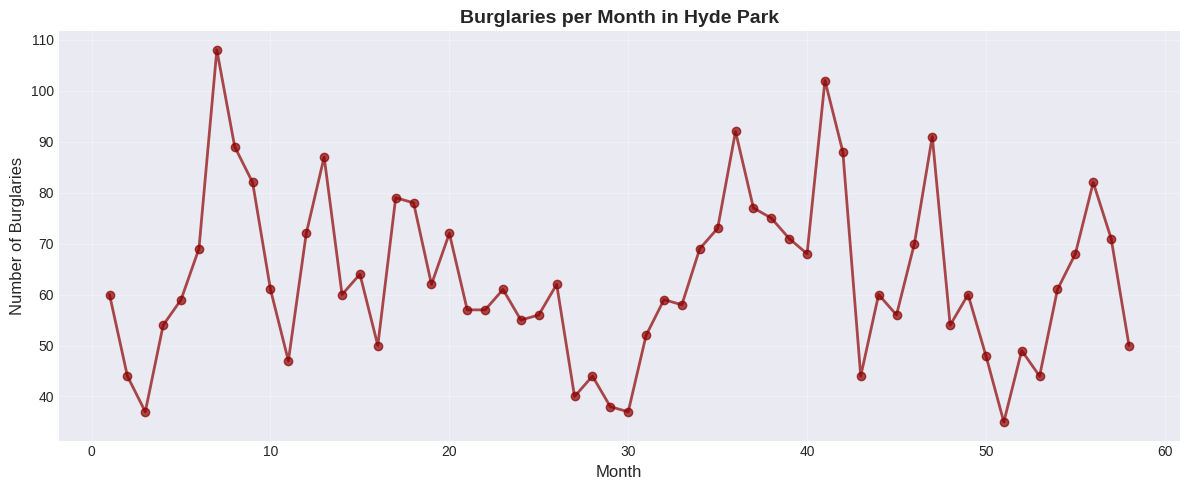

In [ ]:
# Use burglary data from CSV (Hyde Park example from textbook)
burg_data = pd.read_csv('https://raw.githubusercontent.com/chebil/stat/main/part1/timeseries.csv', encoding='utf-16')
burglaries = burg_data['BURG'].to_numpy()
months = np.arange(1, len(burglaries) + 1)

plt.figure(figsize=(12, 5))
plt.plot(months, burglaries, marker='o', linestyle='-', 
         linewidth=2, markersize=6, color='darkred', alpha=0.7)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Burglaries', fontsize=12)
plt.title('Burglaries per Month in Hyde Park', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Example 2: Lynx Pelts Traded (Classic Dataset)

This famous dataset shows **predator-prey dynamics**:
- Many rabbits → lynx thrive → many lynx
- Many lynx eat rabbits → few rabbits remain
- Few rabbits → lynx starve → few lynx
- Few lynx → rabbits recover → cycle repeats!

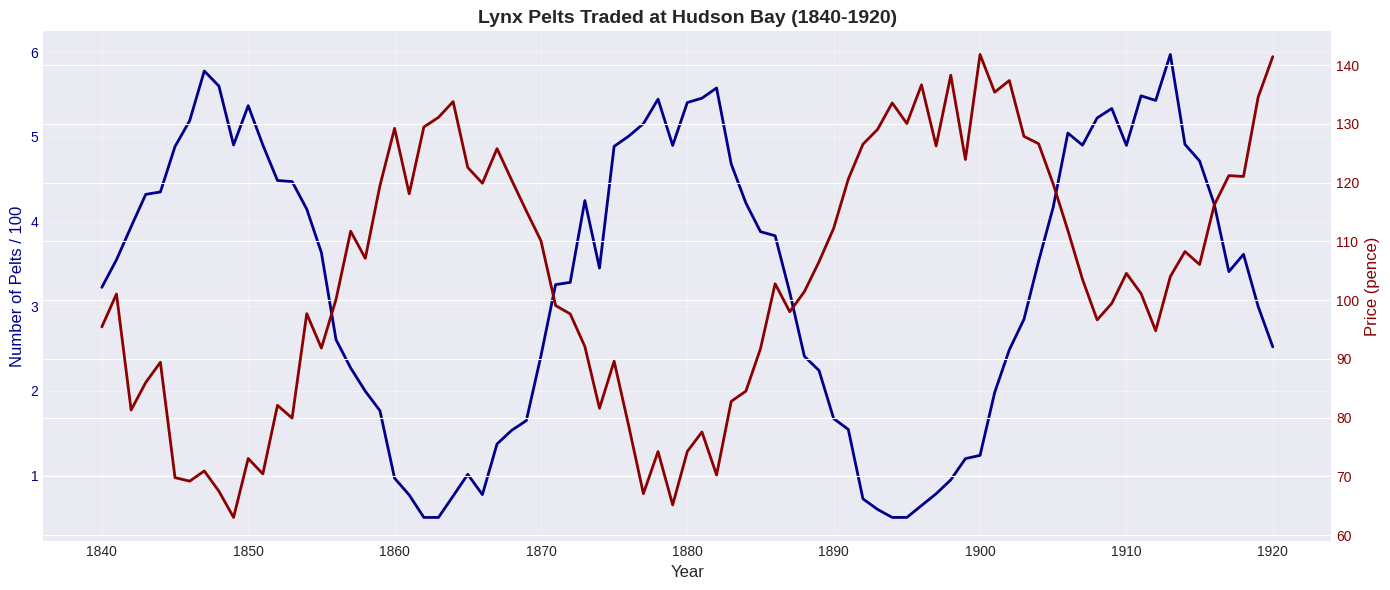

In [7]:
# Simulate lynx population data
years = np.arange(1840, 1921)
# Create periodic pattern for pelts (scaled for visualization)
pelts = 300 + 250 * np.sin((years - 1840)/5) + np.random.normal(0, 30, len(years))
pelts = np.maximum(pelts, 50)  # Ensure positive values

# Price inversely related to supply (basic economics!)
price = 100 + 30 * np.sin((years - 1840)/5 + np.pi) + np.random.normal(0, 5, len(years))
price = np.maximum(price, 50)

# After 1900, prices increase (different economic conditions)
price[years >= 1900] += 30

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot pelts (left y-axis)
color = 'darkblue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Pelts / 100', color=color, fontsize=12)
ax1.plot(years, pelts/100, color=color, linewidth=2, label='Pelts (÷100)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Plot price (right y-axis)
ax2 = ax1.twinx()
color = 'darkred'
ax2.set_ylabel('Price (pence)', color=color, fontsize=12)
ax2.plot(years, price, color=color, linewidth=2, label='Price')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Lynx Pelts Traded at Hudson Bay (1840-1920)', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()


## 2.1.3 Scatter Plots

In some cases, there is no functional relationship between the two variables, but we still want to see if they are related in some way. For example, we might want to see if there is a relationship between height and weight. In this case, we can use a **scatter plot**. A scatter plot is a graph that shows the relationship between two variables by plotting points on a Cartesian plane. Each point represents an observation, with the x-coordinate representing one variable and the y-coordinate representing the other variable.

### When to Use Scatter Plots

Use scatter plots when:
- Both variables are continuous
- You want to see if variables are related
- Neither variable is naturally "time"
- You're looking for patterns, outliers, or clusters

### How to Read Scatter Plots

**Pattern slopes upward** (↗): Positive relationship
**Pattern slopes downward** (↘): Negative relationship
**No pattern** (random cloud): No relationship
**Tight pattern**: Strong relationship
**Loose pattern**: Weak relationship

### Example: Height vs Weight

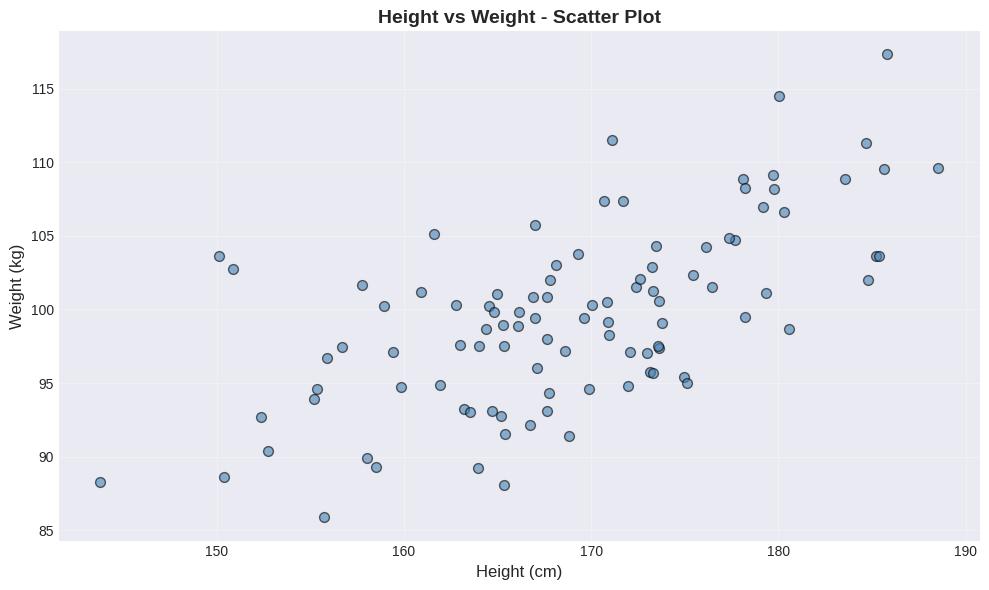

In [8]:
# Generate realistic height-weight data
np.random.seed(42)
n = 100
heights = np.random.normal(170, 10, n)
# Weight correlated with height, plus some random variation
weights = 0.5 * heights + 15 + np.random.normal(0, 5, n)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(heights, weights, alpha=0.6, s=50, color='steelblue', edgecolors='black')
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.title('Height vs Weight - Scatter Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**📊 What to look for:**
- **Overall direction**: Does the cloud of points slope upward (↗) or downward (↘)?
- **Spread**: How tightly clustered are the points around an imaginary line?
- **Outliers**: Any points far from the main pattern?

In this plot, notice the **positive relationship** - taller people tend to weigh more. The scatter shows natural biological variation around this trend.

### The Importance of Standardizing (Normalizing)

**Problem**: Different units make comparisons difficult
- Height in cm: mean 170, std 10
- Weight in kg: mean 70, std 12

**Solution**: Convert to **standard coordinates** (z-scores)

$$z = \frac{x - \bar{x}}{\sigma}$$

After standardization:
- Mean = 0
- Standard deviation = 1
- Units disappear!

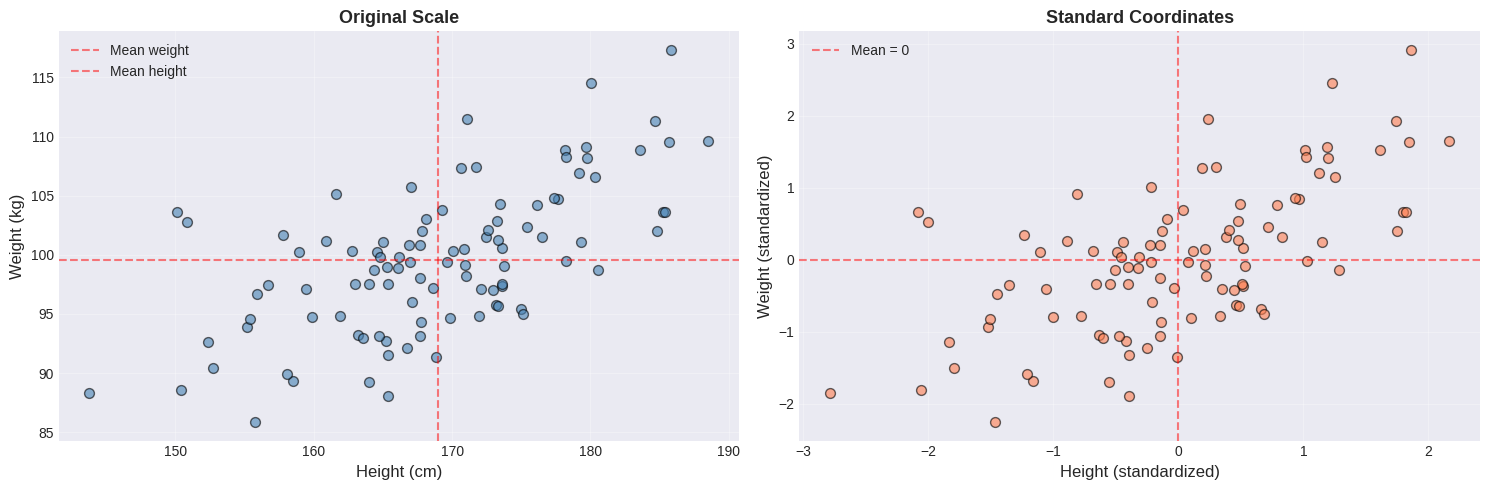

In [9]:
# Standardize the data
heights_std = (heights - np.mean(heights)) / np.std(heights)
weights_std = (weights - np.mean(weights)) / np.std(weights)

# Side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Original scale
ax1.scatter(heights, weights, alpha=0.6, s=50, color='steelblue', edgecolors='black')
ax1.set_xlabel('Height (cm)', fontsize=12)
ax1.set_ylabel('Weight (kg)', fontsize=12)
ax1.set_title('Original Scale', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=np.mean(weights), color='red', linestyle='--', alpha=0.5, label=f'Mean weight')
ax1.axvline(x=np.mean(heights), color='red', linestyle='--', alpha=0.5, label=f'Mean height')
ax1.legend()

# Standard coordinates
ax2.scatter(heights_std, weights_std, alpha=0.6, s=50, color='coral', edgecolors='black')
ax2.set_xlabel('Height (standardized)', fontsize=12)
ax2.set_ylabel('Weight (standardized)', fontsize=12)
ax2.set_title('Standard Coordinates', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Mean = 0')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

**Notice the difference:**

| Feature | Original Scale | Standardized |
|---------|---------------|--------------|
| **X-axis** | Height in cm (155-185) | Z-score (-2 to +2) |
| **Y-axis** | Weight in kg (60-100) | Z-score (-2 to +2) |
| **Center** | Mean values (red dashed) | Origin (0, 0) |
| **Shape** | Identical! | Identical! |

**Key insight:** The *relationship* between variables is preserved. Standardization only changes the scale, not the pattern. This makes it easier to compare different variables on the same scale.

### 🔬 Real-World Example: John Snow's Cholera Map (1854)

One of the most famous scatter plots in history!

**Background:**
- Cholera outbreak in London, 1854
- Cause unknown (germ theory not yet accepted)
- Dr. John Snow created a map of deaths

**The scatter plot:**
- X-axis: Longitude
- Y-axis: Latitude
- Each point: A cholera death
- More points = more deaths at that location

**Discovery:**
Deaths clustered around the Broad Street pump!
→ Proved cholera spread through contaminated water
→ Pump handle removed, outbreak ended
→ Birth of epidemiology!

**Lesson:** A simple scatter plot can save lives! 💡

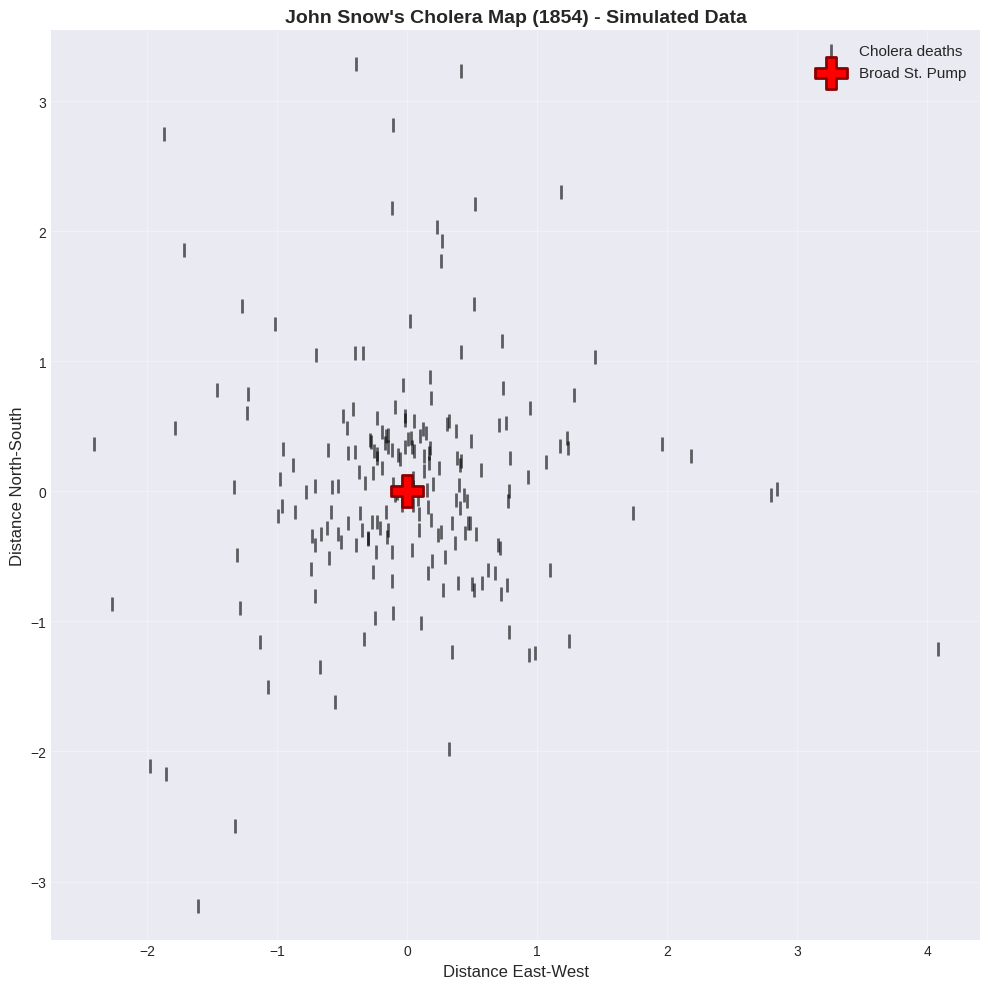

In [10]:
# Simulate cholera death data (for educational purposes)
# Real data available at: https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak

np.random.seed(42)
# Deaths cluster around pump location (0, 0)
n_deaths = 200
# Most deaths near pump
x_deaths = np.concatenate([
    np.random.normal(0, 0.5, int(n_deaths*0.7)),  # 70% very close
    np.random.normal(0, 1.5, int(n_deaths*0.3))   # 30% farther away
])
y_deaths = np.concatenate([
    np.random.normal(0, 0.5, int(n_deaths*0.7)),
    np.random.normal(0, 1.5, int(n_deaths*0.3))
])

# Broad Street pump location
pump_x, pump_y = 0, 0

# Create the famous map
plt.figure(figsize=(10, 10))

# Plot deaths as bars (original style)
plt.scatter(x_deaths, y_deaths, s=100, color='black', marker='|', 
           linewidths=2, alpha=0.6, label='Cholera deaths')

# Plot pump
plt.scatter(pump_x, pump_y, s=500, color='red', marker='P', 
           edgecolors='darkred', linewidths=2, label='Broad St. Pump', zorder=5)

plt.xlabel('Distance East-West', fontsize=12)
plt.ylabel('Distance North-South', fontsize=12)
plt.title("John Snow's Cholera Map (1854) - Simulated Data", 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=11)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 2.1.4 Identifying Relationships

Let's practice identifying different types of relationships in scatter plots.

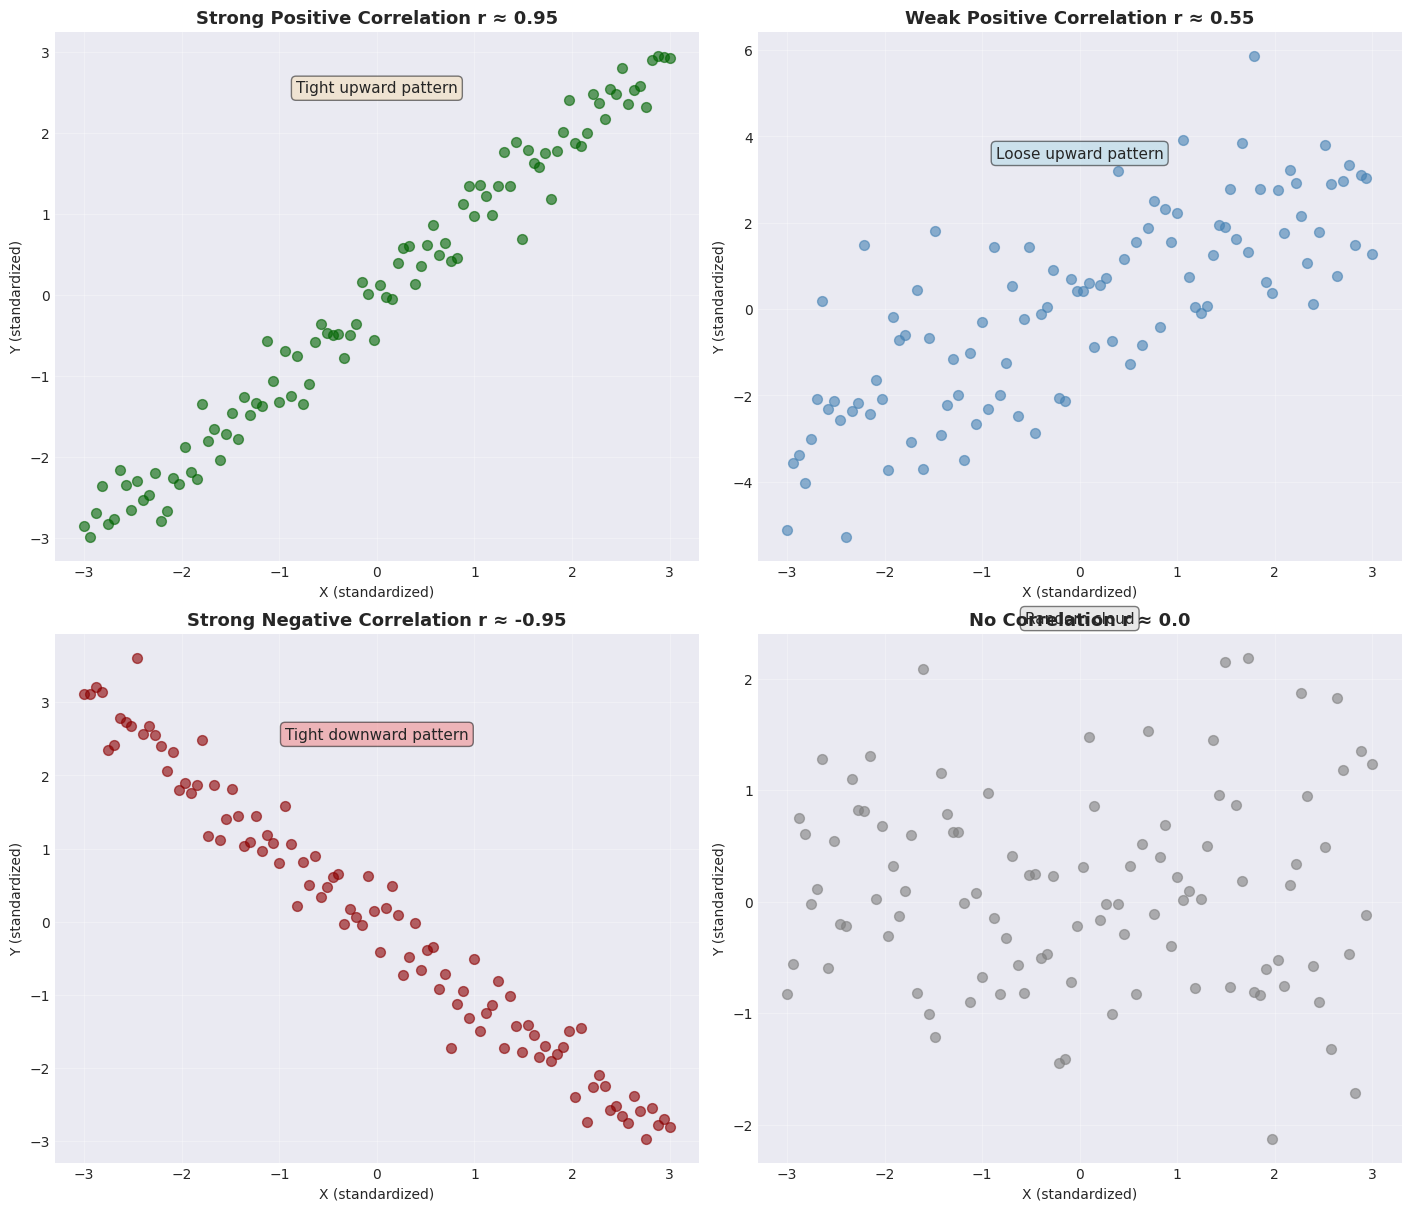

In [17]:
# Create different types of relationships
np.random.seed(42)
plt.rcParams['font.family'] = 'DejaVu Sans'
x = np.linspace(-3, 3, 100)

# Different patterns
y_strong_pos = x + np.random.normal(0, 0.3, 100)
y_weak_pos = x + np.random.normal(0, 1.5, 100)
y_strong_neg = -x + np.random.normal(0, 0.3, 100)
y_no_corr = np.random.normal(0, 1, 100)

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12), constrained_layout=True)

# Strong positive
axes[0,0].scatter(x, y_strong_pos, alpha=0.6, s=50, color='darkgreen')
axes[0,0].set_title('Strong Positive Correlation r ≈ 0.95', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel('X (standardized)')
axes[0,0].set_ylabel('Y (standardized)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].text(0, 2.5, 'Tight upward pattern', ha='center', fontsize=11, 
              bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Weak positive
axes[0,1].scatter(x, y_weak_pos, alpha=0.6, s=50, color='steelblue')
axes[0,1].set_title('Weak Positive Correlation r ≈ 0.55', fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('X (standardized)')
axes[0,1].set_ylabel('Y (standardized)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].text(0, 3.5, 'Loose upward pattern', ha='center', fontsize=11,
              bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Strong negative
axes[1,0].scatter(x, y_strong_neg, alpha=0.6, s=50, color='darkred')
axes[1,0].set_title('Strong Negative Correlation r ≈ -0.95', fontsize=13, fontweight='bold')
axes[1,0].set_xlabel('X (standardized)')
axes[1,0].set_ylabel('Y (standardized)')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].text(0, 2.5, 'Tight downward pattern', ha='center', fontsize=11,
              bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

# No correlation
axes[1,1].scatter(x, y_no_corr, alpha=0.6, s=50, color='gray')
axes[1,1].set_title('No Correlation r ≈ 0.0', fontsize=13, fontweight='bold')
axes[1,1].set_xlabel('X (standardized)')
axes[1,1].set_ylabel('Y (standardized)')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].text(0, 2.5, 'Random cloud', ha='center', fontsize=11,
              bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.show()

**🎓 Practice Exercise:**

Look at each scatter plot and identify:
1. **Direction** - positive, negative, or none
2. **Strength** - strong, moderate, or weak  
3. **Pattern description** - upward/downward/random

*Answers in the plot titles above!*

## 🎯 Key Takeaways

### Remember This!

1. **Scatter plots are powerful** - use them first with 2D continuous data
2. **Standardize when comparing** - removes unit differences
3. **Pattern direction matters**:
   - ↗ Upward = Positive relationship
   - ↘ Downward = Negative relationship
   - ● Random = No relationship
4. **Pattern tightness matters**:
   - Tight = Strong relationship
   - Loose = Weak relationship
5. **Always plot your data** - numbers alone can be misleading!

### Avoid These Mistakes!

❌ Using pie charts for comparisons
❌ Using 3D bar charts (occlusion problems)
❌ Not standardizing when comparing different units
❌ Relying only on summary statistics without visualizing

✅ Use heat maps instead of pie charts
✅ Use stacked bars for categorical data
✅ Always create scatter plots for continuous 2D data
✅ Standardize data before comparing relationships